In [21]:
from spherical_voxels.intersections import SphericalVoxel, find_all_intersections, transform_to_cartesian, transform_to_spherical
import numpy as np 

In [2]:
# create a single voxel
left_edge = np.array([0.4, np.pi/4, np.pi/4])
right_edge = np.array([0.6, np.pi/2, np.pi/2])
axis_id = {'r': 0, 'phi': 1, 'theta': 2}

vox = SphericalVoxel(left_edge, right_edge, axis_id)
left_edge, right_edge

(array([0.4       , 0.78539816, 0.78539816]),
 array([0.6       , 1.57079633, 1.57079633]))

In [3]:
vox.phi_plane_le

array([ 0.2, -0.2,  0. ,  0. ])

In [16]:
# find intersections 

v_model_vertex = np.array([0.6, np.pi/2, np.pi/4])
camer_pos_cartesian = np.array([0.1, -1, 0.1])
t_points, inters, inters_sp, inters_bools = find_all_intersections(v_model_vertex, camer_pos_cartesian, vox)

0.6
[2.59786817e-17 4.24264069e-01 4.24264069e-01]


In [17]:
t_points

{'t_sphere_outer': array([-1.01334976e+00,  1.11022302e-16]),
 't_sphere_inner': array([-0.7448333 , -0.26851646]),
 't_p_1': array([-0.40752621]),
 't_p_2': array([-0.]),
 't_cone_outer': array([inf, inf]),
 't_cone_inner': array([inf, inf])}

In [18]:
inters

{'t_sphere_outer': [array([ 0.06921176, -0.5614941 ,  0.19983521]),
  array([1.83958621e-17, 4.24264069e-01, 4.24264069e-01])],
 't_sphere_inner': [array([ 0.05087209, -0.30028883,  0.25930416]),
  array([0.01833967, 0.16305881, 0.36479512])],
 't_p_1': [array([0.02783403, 0.02783403, 0.33400832])],
 't_p_2': [array([2.59786817e-17, 4.24264069e-01, 4.24264069e-01])],
 't_cone_outer': [array([-inf,  inf,  inf]), array([-inf,  inf,  inf])],
 't_cone_inner': [array([-inf,  inf,  inf]), array([-inf,  inf,  inf])]}

In [19]:
inters_sp

{'t_sphere_outer': [array([ 0.6       , -1.44815143,  1.23125071]),
  array([0.6       , 1.57079633, 0.78539816])],
 't_sphere_inner': [array([ 0.4       , -1.40297914,  0.8654988 ]),
  array([0.4       , 1.45879432, 0.42269232])],
 't_p_1': [array([0.33631982, 0.78539816, 0.11731003])],
 't_p_2': [array([0.6       , 1.57079633, 0.78539816])],
 't_cone_outer': [array([inf, nan, nan]), array([inf, nan, nan])],
 't_cone_inner': [array([inf, nan, nan]), array([inf, nan, nan])]}

In [20]:
inters_bools

{'t_sphere_outer': [False, False],
 't_sphere_inner': [False, False],
 't_p_1': [False],
 't_p_2': [True],
 't_cone_outer': [False, False],
 't_cone_inner': [False, False]}

In [15]:
a = np.array([0.6300606 , 0.6300606 , 0.59414536])
np.sqrt(a[0]**2 + a[1]**2 + a[2]**2)

1.0709628509683469

In [10]:
inters_sp['t_p_2'][0] >= left_edge

array([ True,  True, False])

In [11]:
left_edge[1]

0.7853981633974483

In [12]:
inters_sp['t_p_2'][0][1]

1.4477447112461415

In [62]:
xg = np.linspace(-1, 1, 50)
yg = np.linspace(-1, 1, 51)
zg = np.linspace(-1, 1, 52)
xg, yg, zg = np.meshgrid(xg, yg, zg, indexing='ij')

In [98]:
R = np.sqrt(xg ** 2 + yg**2 + zg**2)
Phi = np.arctan2(xg, yg)  # THe 2pi angle, inv tan(xg / yg) w quadraant selection
Theta = np.arctan2(np.sqrt(xg**2 + yg**2), zg)

in_element = 1 * (R >= left_edge[0]) * (R<=right_edge[0]) 
in_element = in_element * (Phi >= left_edge[1]) * (Phi <= right_edge[1]) 
in_element = in_element * (Theta <= right_edge[2]) * (Theta >= left_edge[2])

In [99]:
in_element.shape

(50, 51, 52)

In [100]:
import matplotlib.pyplot as plt

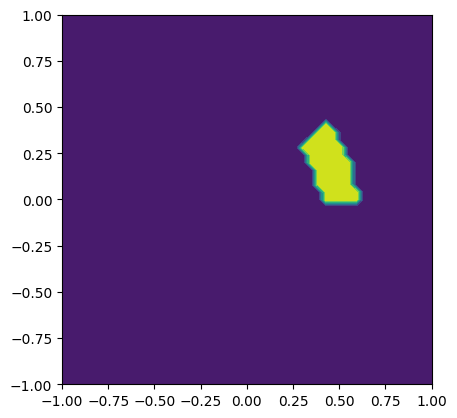

In [101]:
iz = 27
plt.contourf(xg[:,:,iz], yg[:,:,iz], in_element[:,:,iz])
plt.gca().set_aspect('equal')

In [83]:
left_edge

array([0.4       , 0.78539816, 0.78539816])